In [100]:
#Importing necessary libarires 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [36]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [89]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.850000,0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,56.95,1889.500000,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.150002,1,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,45,42.30,1840.750000,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,2,70.70,151.649994,1,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Impute missing values
There are only 11 missing values, all of them for the TotalCharges column. This values are actually a blank space in the csv file and are exclusive for customers with zero tenure. It's possible to concluded that they are missing due to the fact that the customer never paied anything to the company. We will impute this missing values with zero:

In [39]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Target variable
We are trying to predict if the client left the company in the previous month. Therefore we have a binary classification problem with a slightly unbalanced target:

1. Churn: No - 72.4%
2. Churn: Yes - 27.6%

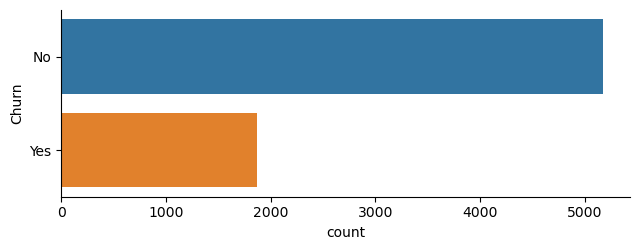

In [50]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

## Numerical features
There are only three numerical columns: tenure, monthly charges and total charges. The probability density distribution can be estimate using the seaborn kdeplot function.

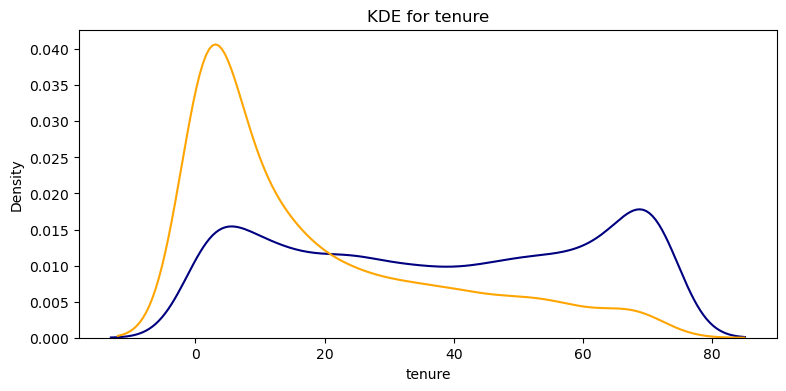

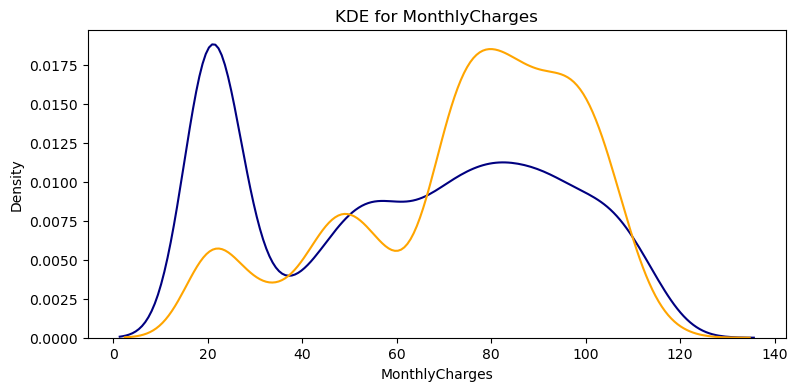

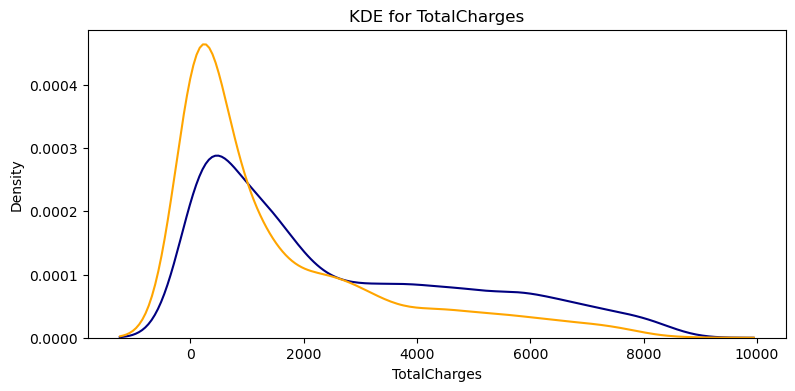

In [11]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:

1. Recent clients are more likely to churn
2. Clients with higher MonthlyCharges are also more likely to churn
3. Tenure and MonthlyCharges are probably important features

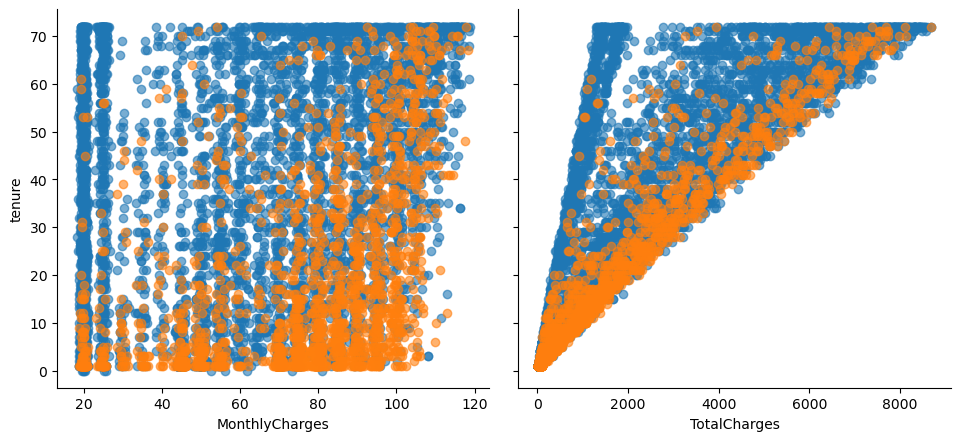

In [12]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

Another feature we can consider is the difference between the MonthlyCharges and the TotalCharges divided by the tenure:

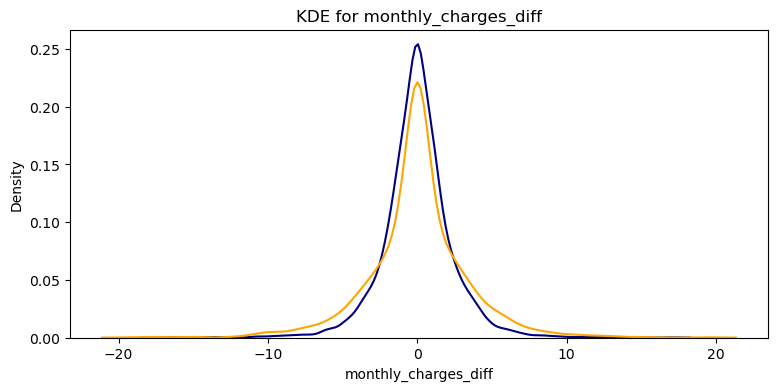

In [13]:
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff')

Not a promising feature at first glance, but it might be usefull when combined with categorical features.

## Categorical features
This dataset has 16 categorical features:

1. Six binary features (Yes/No)
2. Nine features with three unique values each (categories)
3. One feature with four unique values

### Gender and Age (SeniorCitizen)

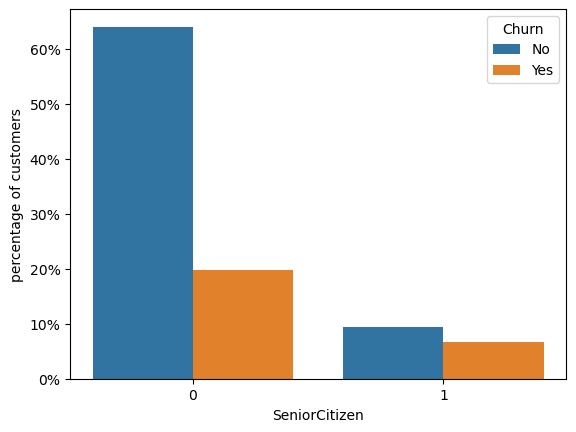

In [15]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

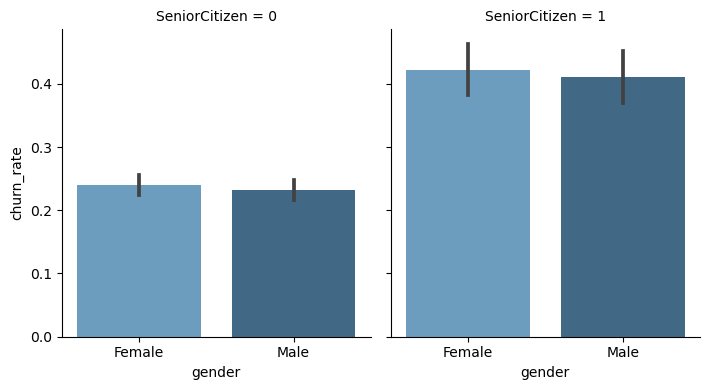

In [16]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

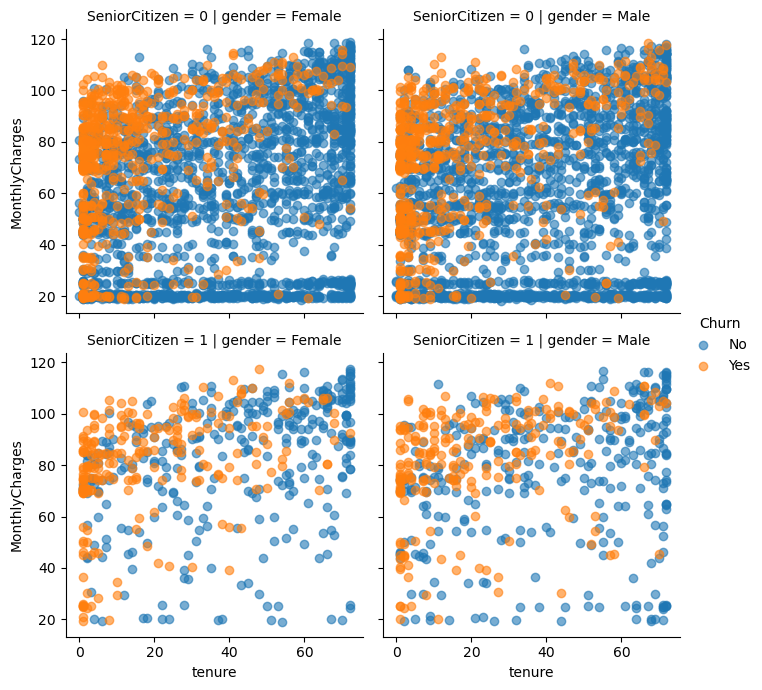

In [17]:
g = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

1. Gender is not an indicative of churn.
2. SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.
3. There are no special relations between this categorical values and the main numerical features.

### Partner and dependents

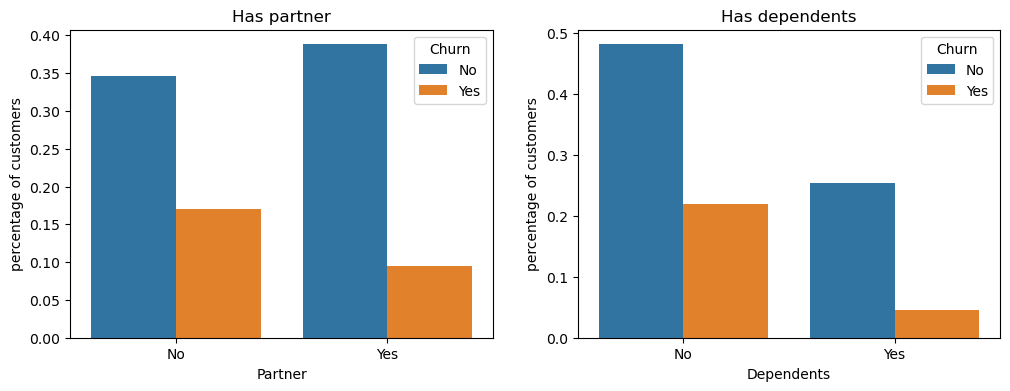

In [18]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

1. Customers that doesn't have partners are more likely to churn
2. Customers without dependents are also more likely to churn

### Phone and Internet services
Now let's look at the services that customers are using. There are only two main services: phone and internet but the former has many additionals like online backup and security.

#### Phone services
There are only two features here: if the client has phone and if he has more than one line. Both can be summed up in one chart:

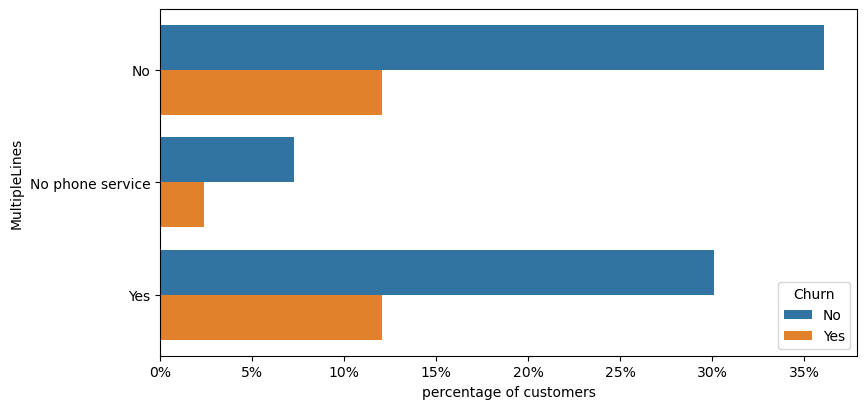

In [19]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

1. Few customers doesn't have phone service
2. Customers with multiple lines have a slightly higher churn rate

Let's see how multiple lines affects the monthly charges:

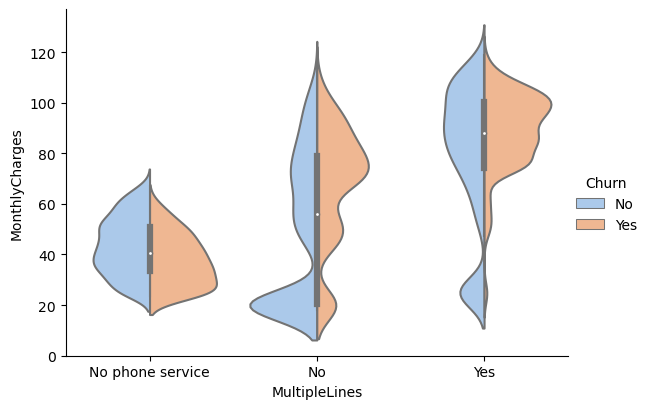

In [20]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

#### Internet services



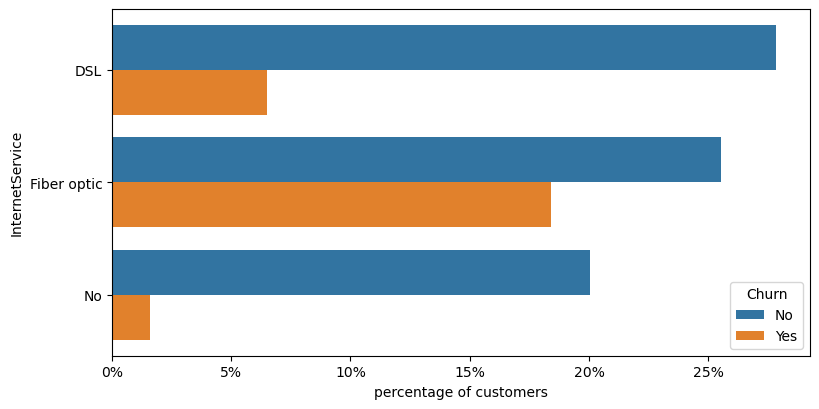

In [21]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

1. Clients without internet have a very low churn rate
2. Customers with fiber are more probable to churn than those with DSL connection

Comparing the Internet service with monthly charges:

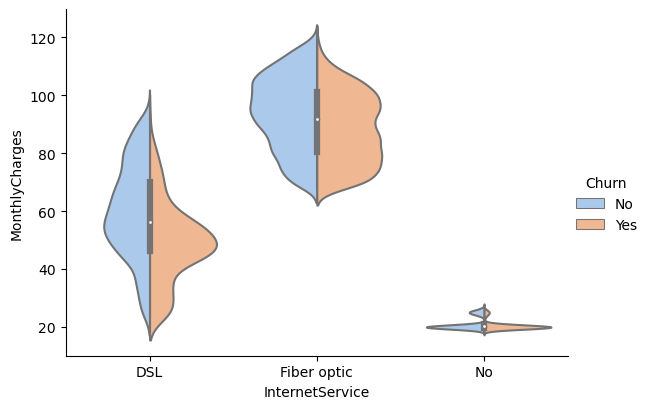

In [22]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4);

It's interesting how customers with DSL (slower connection) and higher charges are less probable to churn.

#### Additional services
There are six additional services for customers with internet:

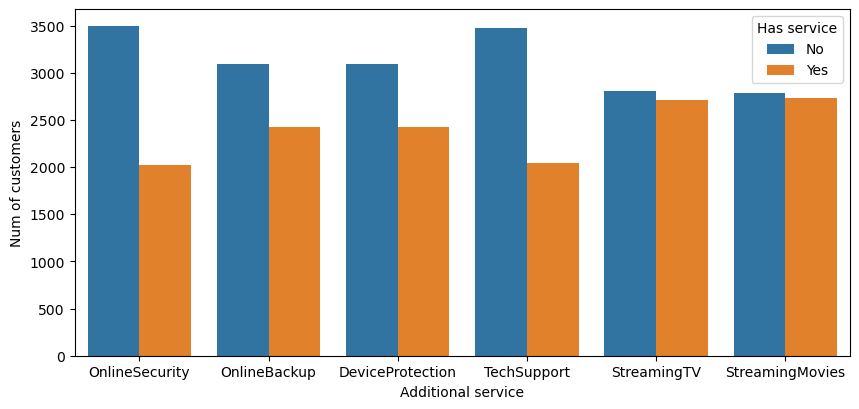

In [23]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

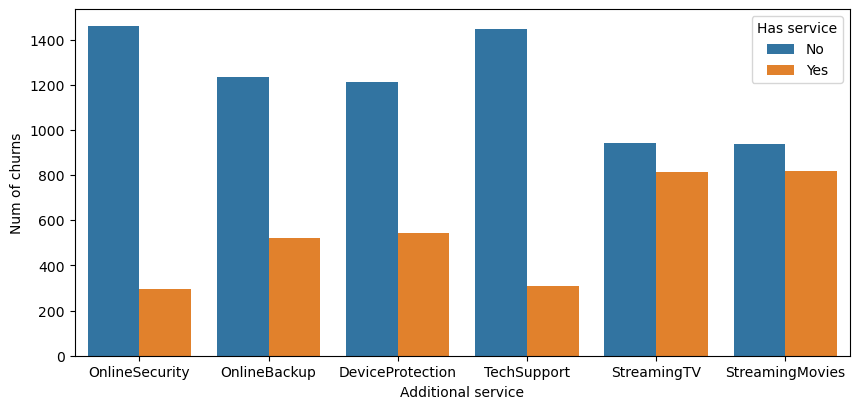

In [24]:
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

The first plot shows the total number of customers for each additional service, while the second shows the number of clients that churn. We can see that:

1. Customers with the first 4 additionals (security to tech support) are more unlikely to churn
2. Streaming service is not predictive for churn

### Contract and Payment

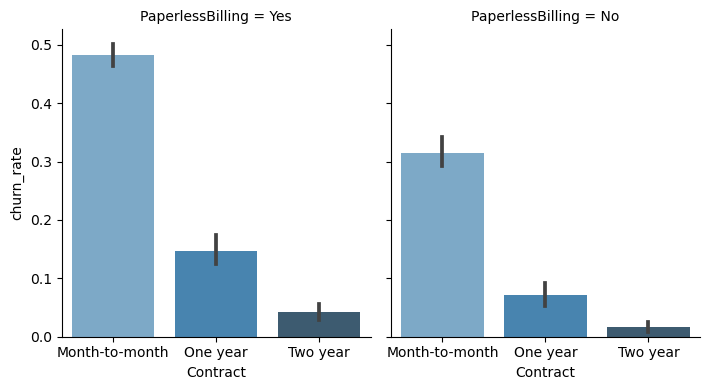

In [26]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

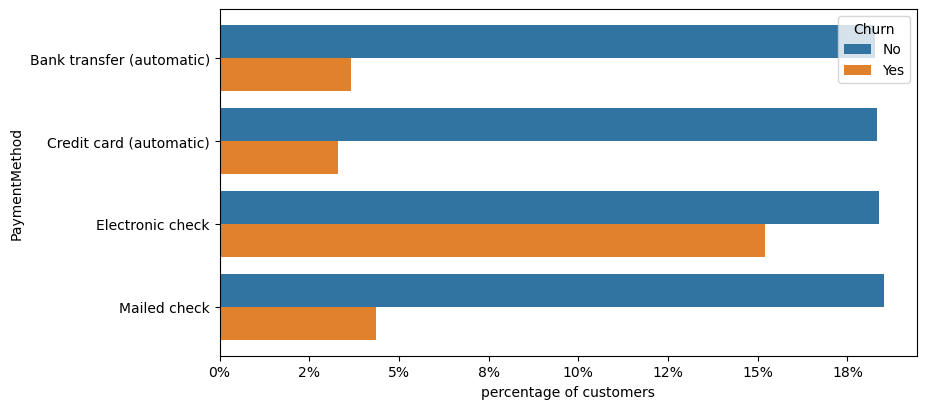

In [27]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

A few observations:

1. Customers with paperless billing are more probable to churn
2. The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
3. Short term contracts have higher churn rates

One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn. A time-series dataset would be better to understand this kind of behaviour. Now let's have a look at the relation with numerical features:

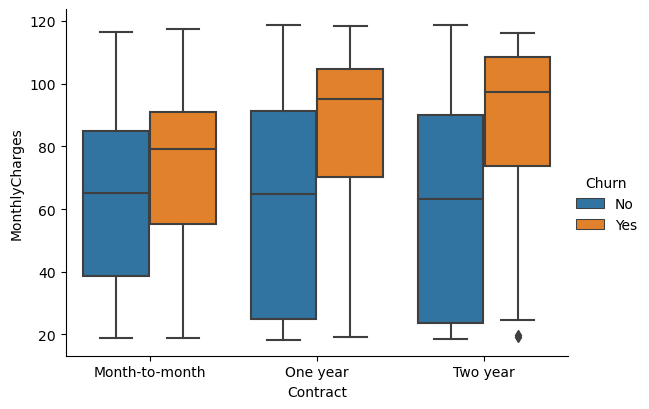

In [28]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)

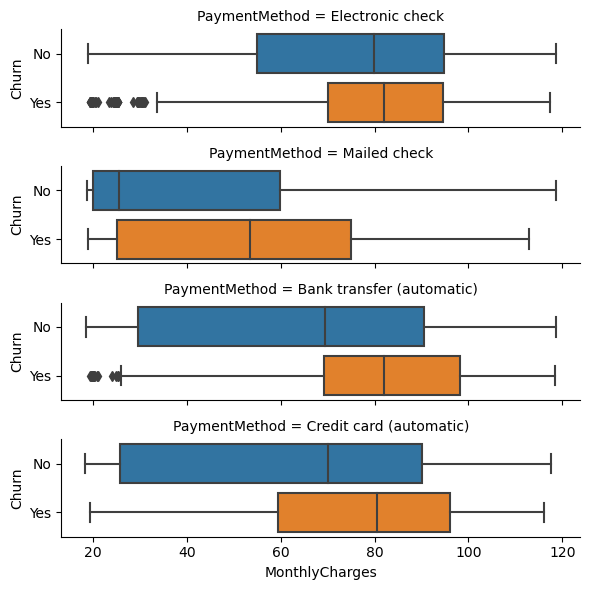

In [29]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df, height=1.5, aspect=4, orient='h')

1. Longer contracts are more affected by higher monthly charges (for churn rate).
2. Mailed checks have lower charges
3. There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check

## Correlation between features
Correlation heatmap (Pearson method)

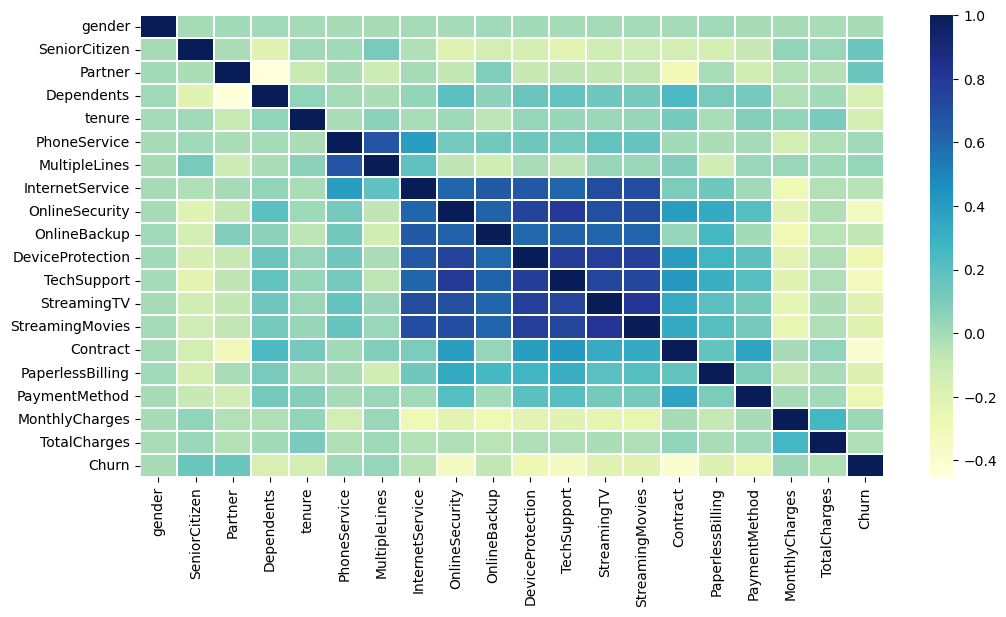

In [54]:
plt.figure(figsize=(12, 6))
df.drop(['customerID'],
        axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

# Label Encoder

For converting Churn into numerical

In [61]:
le = preprocessing.LabelEncoder()

In [62]:
le.fit(df['Churn'])

LabelEncoder()

In [63]:
df['Churn'] = le.fit_transform(df['Churn'])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# One Hot Encoder

For all categorical columns in X

In [68]:
cat_cols = df.select_dtypes(include=['object']).columns

In [69]:
cat_cols = [col for col in cat_cols if df[col].nunique() < 10]

In [72]:
ohe = OneHotEncoder()

In [73]:
df_cat = pd.DataFrame(ohe.fit_transform(df[cat_cols]).toarray(), columns=ohe.get_feature_names_out())

In [75]:
df_cat.head(3)

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [76]:
df = df.drop(columns=cat_cols)

In [77]:
df = pd.concat([df, df_cat], axis=1)

In [78]:
df = df.dropna()

In [81]:
df.isna().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

# Train test split

In [80]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [82]:
#Dividing dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# Decision Tree

In [96]:
clf = DecisionTreeClassifier(min_samples_split=500)

In [97]:
clf = clf.fit(X_train, y_train)

In [98]:
clf

DecisionTreeClassifier(min_samples_split=500)

[Text(0.5344827586206896, 0.95, 'x[36] <= 0.5\ngini = 0.391\nsamples = 5625\nvalue = [4125, 1500]'),
 Text(0.3448275862068966, 0.85, 'x[2] <= 93.675\ngini = 0.125\nsamples = 2516\nvalue = [2347, 169]'),
 Text(0.27586206896551724, 0.75, 'x[18] <= 0.5\ngini = 0.074\nsamples = 1899\nvalue = [1826, 73]'),
 Text(0.2413793103448276, 0.65, 'x[37] <= 0.5\ngini = 0.045\nsamples = 1487\nvalue = [1453, 34]'),
 Text(0.1724137931034483, 0.55, 'x[2] <= 92.425\ngini = 0.018\nsamples = 902\nvalue = [894, 8]'),
 Text(0.13793103448275862, 0.45, 'x[1] <= 67.5\ngini = 0.016\nsamples = 895\nvalue = [888, 7]'),
 Text(0.10344827586206896, 0.35, 'x[3] <= 4819.95\ngini = 0.024\nsamples = 577\nvalue = [570, 7]'),
 Text(0.06896551724137931, 0.25, 'x[2] <= 19.375\ngini = 0.015\nsamples = 537\nvalue = [533, 4]'),
 Text(0.034482758620689655, 0.15, 'gini = 0.062\nsamples = 31\nvalue = [30, 1]'),
 Text(0.10344827586206896, 0.15, 'x[41] <= 0.5\ngini = 0.012\nsamples = 506\nvalue = [503, 3]'),
 Text(0.06896551724137931

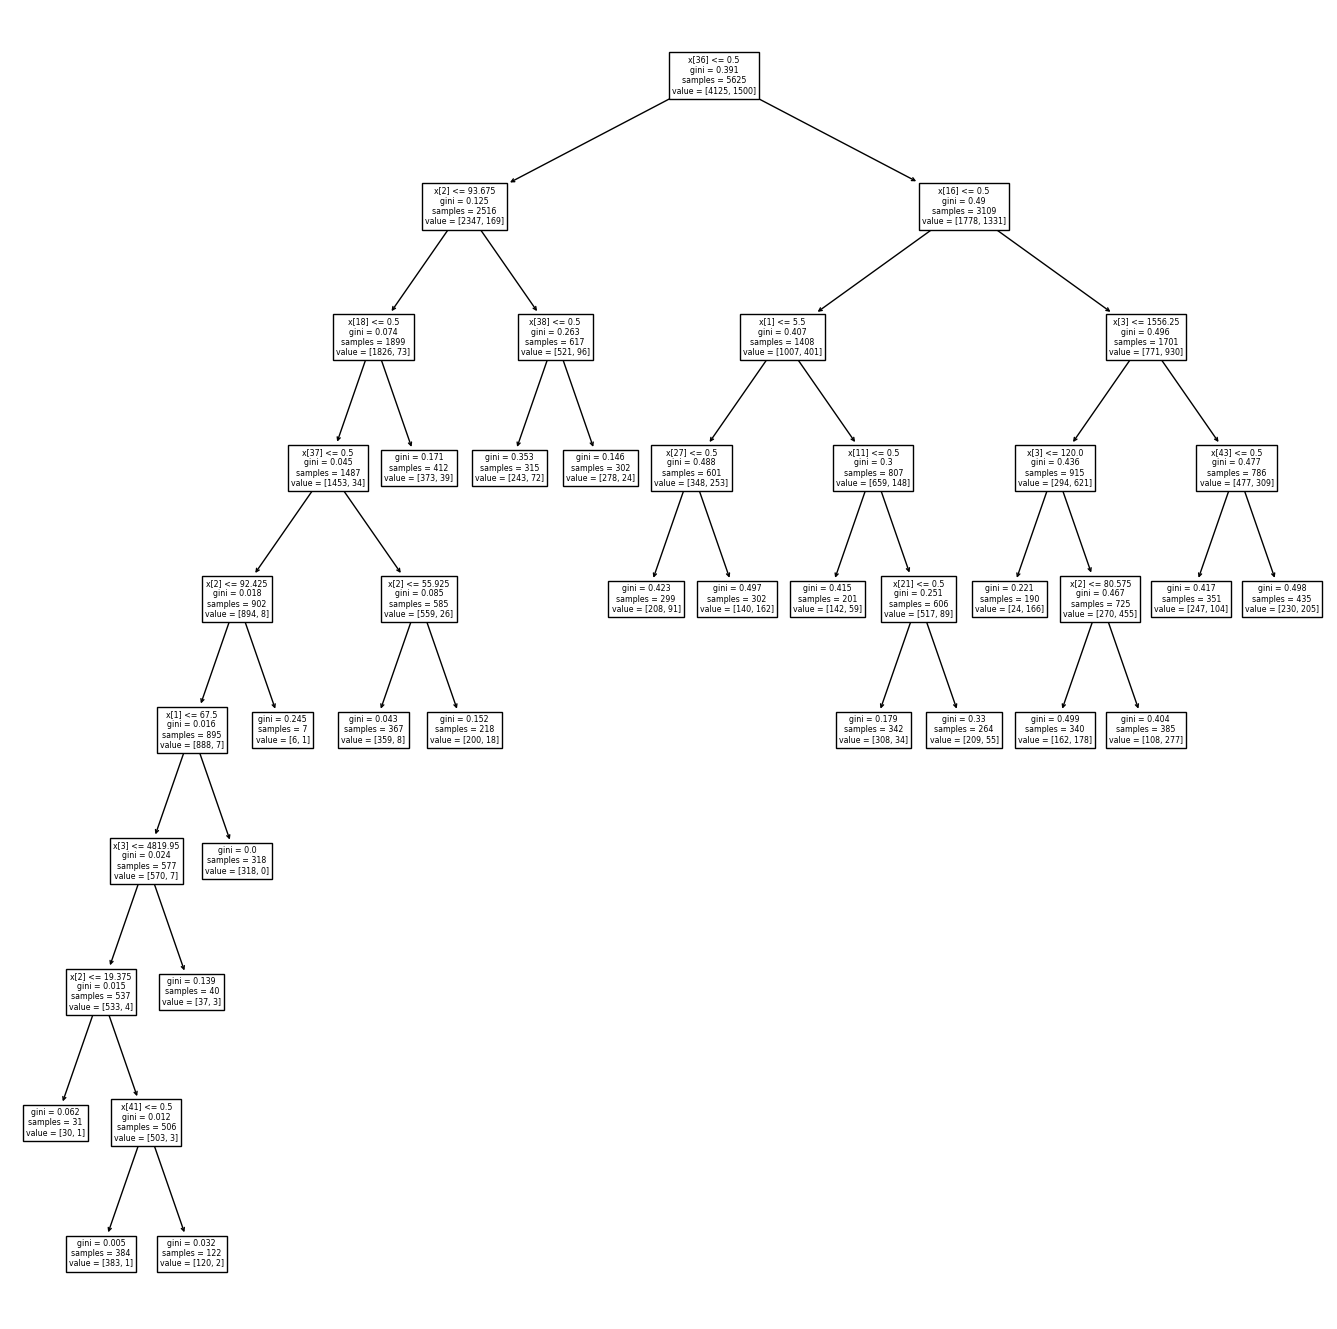

In [99]:
#Plotting decision tree classifier
plt.figure(figsize = (17,17))
tree.plot_tree(clf)

# Accuracy Score

## Training Accuracy

In [101]:
y_pred_train_clf = clf.predict(X_train)

In [102]:
y_pred_train_clf

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
acc = accuracy_score(y_train,y_pred_train_clf)

In [112]:
acc

0.7953091684434968

In [113]:
cm = confusion_matrix(y_train,y_pred_train_clf)

## Confusion Matrix for Training data 

Text(0.5, 1.0, 'Prediction')

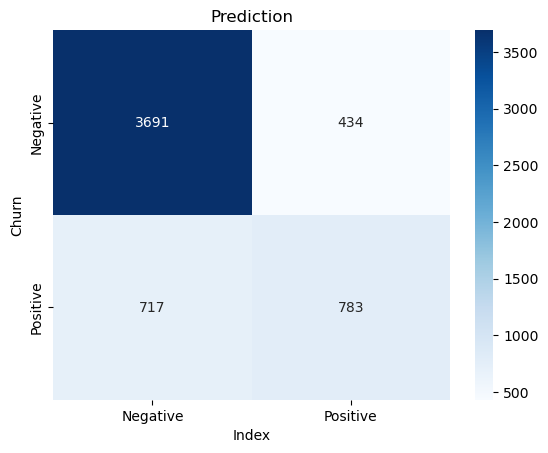

In [106]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Index')
plt.ylabel('Churn')
plt.title('Prediction')

## Testing Accuracy

In [107]:
y_pred_test_clf = clf.predict(X_test)

In [108]:
acc = accuracy_score(y_test,y_pred_test_clf)

In [114]:
acc

0.7953091684434968

## Confusion Matrix for Testing data

Text(0.5, 1.0, 'Prediction')

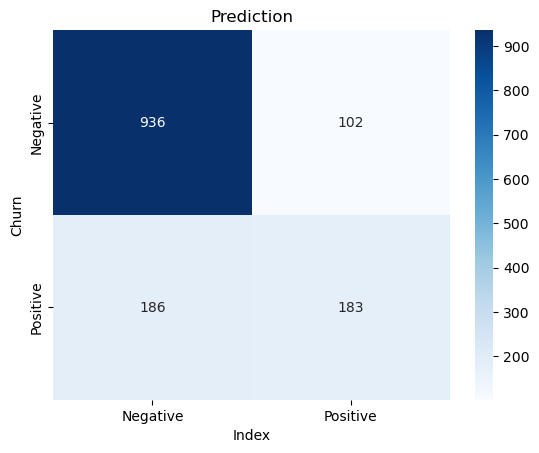

In [111]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Index')
plt.ylabel('Churn')
plt.title('Prediction')

# Model Testing 

In [1]:
#Creating function for model testing
def make_prediction(input_string):
    le = preprocessing.LabelEncoder()
    encoded_input = le.transform([input_string])
    prediction = lr.predict(input_string)
    return prediction